<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/12%EC%9D%BC%EC%B0%A8_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 미니 프로젝트: 가위바위보 분류기 만들기

### 0. colab환경에서 학습하기 위한 구글 드라이브에 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

print(os.getenv("HOME"))

/root


[!cd로 디렉토리를 이동했을 때 동작하지 않는 문제 해결](https://stackoverflow.com/questions/53854159/accessing-files-on-google-colab)
- %cd로 실행하면 잘 동작하는 것을 확인할 수 있다.

In [23]:
%cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock"

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock


In [24]:
%ls

rock_all.zip


In [60]:
# !unzip rock_all.zip

# 가위 이미지 데이터는 직접 구글 드라이브에 업로드 함.
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
# !unzip scissor_all.zip

# %cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper"
# !unzip paper_all.zip

### 1. 데이터 불러오기 + Resize 하기

In [33]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    # number_of_data와 img_size*img_size와 color(채널수)를 모두 곱한 크기의 0행렬이 생성된다.
    # 이 행렬을 우리가 원하는 크기인 (데이터수, 이미지크기x, 이미지크기y, 채널수)로 reshape해주는 과정이다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x, y)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_norm = x/255.0

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=66, test_size=0.3)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


전처리 된 tran set 이미지 출력해보기

라벨:  0


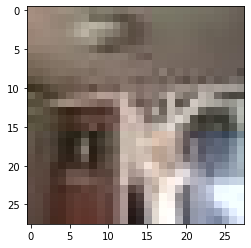

In [40]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 딥러닝 네트워크 설계하기

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 하이퍼파라미터
n_channel_1=32
n_channel_2=64
n_dense=64

# model 구성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (No

### 3. 딥러닝 네트워크 학습시키기

In [42]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

print(x_train.shape)
print(x_test.shape)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

n_train_epoch=20
# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

(2100, 28, 28, 3)
(900, 28, 28, 3)
Epoch 1/20
66/66 [==============================] - 32s 4ms/step - loss: 1.0984 - accuracy: 0.3657
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 0.9658 - accuracy: 0.5200
Epoch 3/20
66/66 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.6152
Epoch 4/20
66/66 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7319
Epoch 5/20
66/66 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7905
Epoch 6/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8467
Epoch 7/20
66/66 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8876
Epoch 8/20
66/66 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9105
Epoch 9/20
66/66 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9333
Epoch 10/20
66/66 [==============================] - 0s 3ms/step - loss: 0.1738 - 

### [아예 새로운 데이터로 test set 구성후, 다시 테스트 해보기]
- train set은 총 10명이 찍은 데이터로, test set은 총 3명이 찍은 데이터로 구성해보았다.
- 위에서 unzip하는 과정을 새롭게 만든 test set으로 다시 해준다.

In [61]:
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock_test
# !ls
# !unzip rock_all_test.zip

# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
# !unzip scissor_all_test.zip

# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper_test
# !unzip paper_all_test.zip

In [51]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor_test"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock_test"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper_test"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("test set 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x_test, y_test)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_test = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test set 데이터(x_test)의 이미지 개수는 900 입니다.
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


In [59]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 3.3764 - accuracy: 0.4311
test_loss: 3.3764359951019287 
test_accuracy: 0.43111109733581543
